In [339]:
import pandas as pd 
import numpy as np 


In [340]:
df=pd.read_csv("course_lead_scoring.csv")
df.head()

df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [342]:
categorical=["lead_source ","industry","employment_status","location"]

In [343]:
numerical=["number_of_courses_viewed","interaction_count","lead_score"]

In [344]:
df.isnull().sum()




lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

Data preparation
Check if the missing values are presented in the features.
If there are missing values:
For caterogiral features, replace them with 'NA'
For numerical features, replace with with 0.0

In [345]:
 df[df.select_dtypes(include='object').columns]=df.select_dtypes(include='object').fillna('NA')

In [346]:
#Replace missing value with 0.0 for numerical feature
df[df.select_dtypes(include='number').columns]=(df.select_dtypes(include='number').fillna(0.0))


In [347]:
df.head(10)

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
5,events,manufacturing,1,59904.0,NA,africa,6,0.83,1
6,social_media,technology,0,51283.0,NA,middle_east,2,0.57,0
7,social_media,NA,5,62975.0,student,europe,4,0.62,1
8,referral,healthcare,4,38648.0,unemployed,south_america,2,0.86,1
9,paid_ads,other,3,59866.0,student,australia,3,0.43,1


In [348]:
df.duplicated().sum()

0

In [349]:
#Perform train/val/test with sklearn
from sklearn.model_selection import train_test_split
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=41)
len(df_full_train),len(df_test)

(1169, 293)

In [350]:
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=41)
len(df_full_train),len(df_val),len(df_test)

(1169, 293, 293)

In [351]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [352]:
df_train.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [353]:
y_train=df_train.converted.values
y_test=df_test.converted.values
y_val=df_val.converted.values

In [354]:
del df_train["converted"]
del df_test["converted"]
del df_val["converted"]

<Axes: xlabel='lead_score', ylabel='Count'>

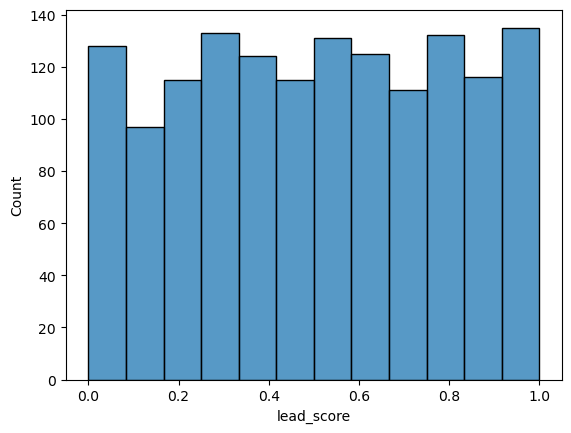

In [355]:
sns.histplot(df["lead_score"])

Question 2. Biggest correlation (1 point)


interaction_count and lead_score

number_of_courses_viewed and lead_score

number_of_courses_viewed and interaction_count

annual_income and interaction_count

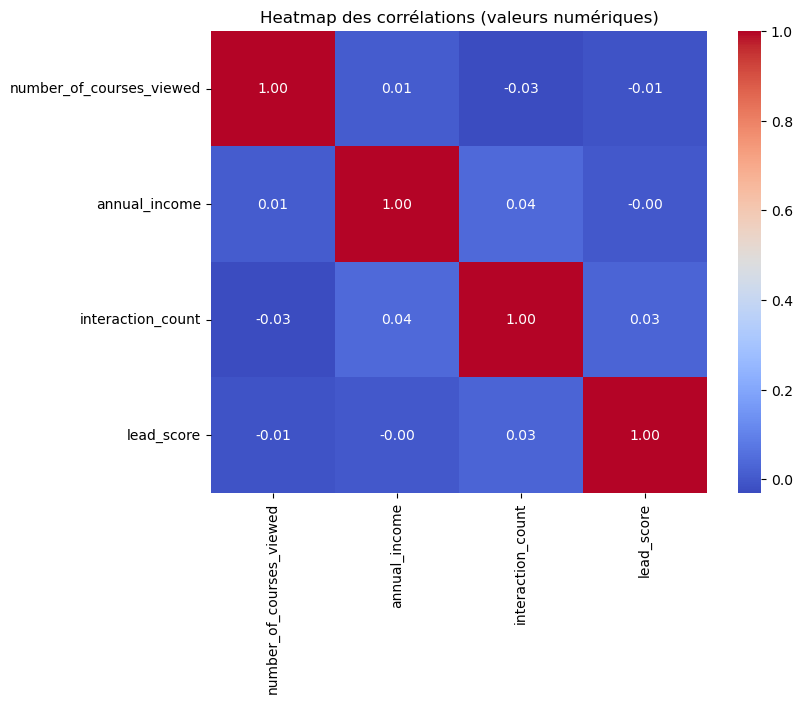

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation des colonnes numériques
corr_matrix = df_train.select_dtypes(include="number").corr(method='spearman').round(2)

# Création de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap des corrélations (valeurs numériques)")
plt.show()

The answer is:annual_income and interaction_count

In [357]:
df_train["industry"].mode()[0]


'other'

In [358]:
import matplotlib.pyplot as plt

# Comptage des valeurs
counts = df_train["industry"].value_counts()
counts



industry
other            118
technology       118
healthcare       117
finance          117
retail           112
education        109
manufacturing     98
NA                87
Name: count, dtype: int64

Question 3. Biggest MI (1 point)


industry

location

lead_source

employment_status

In [359]:
from sklearn.metrics import mutual_info_score
print(mutual_info_score(df_full_train['converted'],df_full_train['industry']))
print(mutual_info_score(df_full_train.location,df_full_train.converted))
print(mutual_info_score(df_full_train.lead_source,df_full_train.converted))
print(mutual_info_score(df_full_train.employment_status,df_full_train.converted))

0.006944649376852907
0.0017653665638312638
0.026519205115208166
0.012911922014491733


The answer is: lead_source

In [360]:
# Remove extra spaces in your categorical and numerical lists
categorical = [col.strip() for col in categorical]
numerical = [col.strip() for col in numerical]

# Also make sure DataFrame columns are clean
df_train.columns = df_train.columns.str.strip()

# Now this should work
df_train_dict = df_train[categorical + numerical].to_dict(orient='records')
from sklearn.feature_extraction import DictVectorizer
dv=DictVectorizer(sparse=False)
X_train=dv.fit_transform(df_train_dict)
df_val_dict=df_val[categorical+numerical].to_dict(orient='records')
X_val=dv.transform(df_val_dict)


Question 4
Now let's train a logistic regression.
Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
What accuracy did you get?

0.64
0.74
0.84
0.94

In [361]:
#training logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [370]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", round(accuracy, 2))


Accuracy: 0.74


The accutacy is :0.74

Question 5
Let's find the least useful feature using the feature elimination technique.
Train a model using the same features and parameters as in Q4 (without rounding).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?

'industry'
'employment_status'
'lead_score'

In [364]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# === 1️⃣ Nettoyage des noms de colonnes ===
df.columns = df.columns.str.strip()

# === 2️⃣ Définition des variables ===
categorical = ['lead_source', 'industry', 'employment_status', 'location']
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']
target = 'converted'   # ⚠️ Remplace par le vrai nom de ta variable cible

# === 3️⃣ Split train/validation ===
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)

# === 4️⃣ One-hot encoding ===
dv = DictVectorizer(sparse=False)
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
y_train = df_train[target].values
y_val = df_val[target].values

# === 5️⃣ Entraînement du modèle de base ===
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
base_acc = accuracy_score(y_val, y_pred)

print(f"✅ Base accuracy: {base_acc:.2f}")

# === 6️⃣ Sélection des features à tester ===
features_to_test = ['industry', 'employment_status', 'lead_score']

# On récupère toutes les colonnes encodées
feature_names = dv.get_feature_names_out()

# === 7️⃣ Boucle d'élimination ===
results = {}

for feature in features_to_test:
    # Trouver toutes les colonnes one-hot liées à cette feature
    related_cols = [i for i, name in enumerate(feature_names) if name.startswith(feature + '=') or name == feature]
    
    if not related_cols:
        print(f"⚠️ Aucune colonne trouvée pour {feature}")
        continue

    # Supprimer ces colonnes
    X_train_reduced = np.delete(X_train, related_cols, axis=1)
    X_val_reduced = np.delete(X_val, related_cols, axis=1)

    # Réentraîner le modèle
    model_reduced = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_reduced.fit(X_train_reduced, y_train)
    y_pred_reduced = model_reduced.predict(X_val_reduced)
    acc_reduced = accuracy_score(y_val, y_pred_reduced)

    # Calcul de la différence
    diff = base_acc - acc_reduced
    results[feature] = diff

# === 8️⃣ Résultat final ===
print("\nDifférences d'accuracy :")
for k, v in results.items():
    print(f"{k}: {v:.5f}")

least_useful = min(results, key=results.get)
print(f"\n💤 Feature la moins utile : {least_useful}")


✅ Base accuracy: 0.74

Différences d'accuracy :
industry: 0.00000
employment_status: 0.01024
lead_score: -0.00341

💤 Feature la moins utile : lead_score


 The answer is : lead_score

In [369]:

C_values = [0.01, 0.1, 1, 10, 100]
results = {}

for C in C_values:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    results[C] = round(acc, 3)
    print(f"C={C:<6} -> Accuracy={round(acc, 3)}")

# === 6️⃣ Best result ===
best_C = max(results, key=results.get)
print("\n✅ Best C value:", best_C)
print("Validation accuracy:", results[best_C])

C=0.01   -> Accuracy=0.734
C=0.1    -> Accuracy=0.737
C=1      -> Accuracy=0.737
C=10     -> Accuracy=0.737
C=100    -> Accuracy=0.737

✅ Best C value: 0.1
Validation accuracy: 0.737


We take the smallest so the aswer is :c=0.01